<a href="https://colab.research.google.com/github/maddy2005/Finance_project/blob/main/Trading_strategy_on_historical_stock_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy matplotlib yfinance


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


In [3]:
stock = "TCS.NS"
data = yf.download(stock, start="2022-01-01", end="2024-01-01")


/tmp/ipython-input-1032484191.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start="2022-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


In [4]:
data = data[['Close']]
data.dropna(inplace=True)


In [5]:
data['MA_20'] = data['Close'].rolling(window=20).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()


In [6]:
data['Signal'] = 0
data.loc[data['MA_20'] > data['MA_50'], 'Signal'] = 1


In [7]:
data['Position'] = data['Signal'].diff()


In [8]:
data['Market_Return'] = data['Close'].pct_change()


In [9]:
data['Strategy_Return'] = data['Market_Return'] * data['Signal'].shift(1)


In [10]:
data.dropna(inplace=True)


In [11]:
data['Cumulative_Market_Return'] = (1 + data['Market_Return']).cumprod()
data['Cumulative_Strategy_Return'] = (1 + data['Strategy_Return']).cumprod()


In [12]:
sharpe_ratio = (
    data['Strategy_Return'].mean() /
    data['Strategy_Return'].std()
) * np.sqrt(252)

print("Sharpe Ratio:", sharpe_ratio)


Sharpe Ratio: -0.41908768043914196


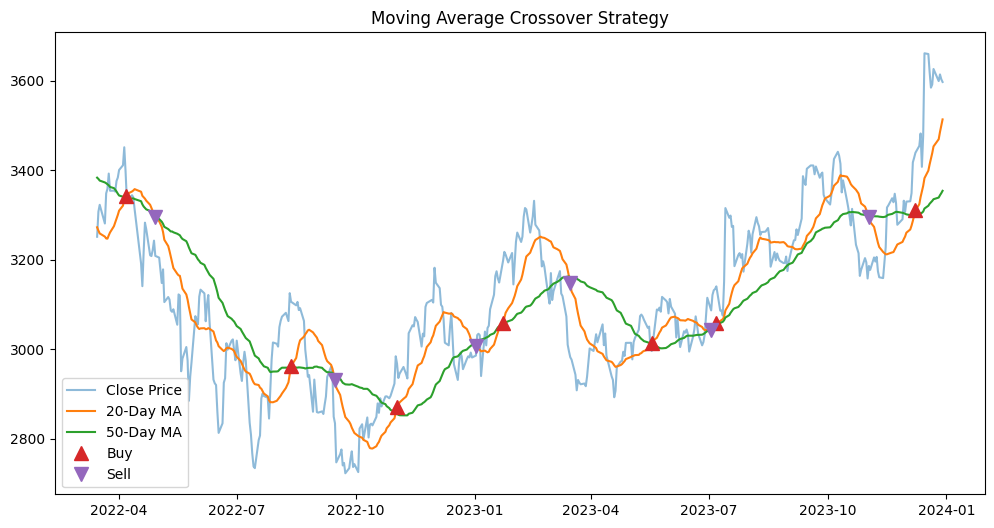

In [13]:
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Close Price', alpha=0.5)
plt.plot(data['MA_20'], label='20-Day MA')
plt.plot(data['MA_50'], label='50-Day MA')

plt.plot(data[data['Position'] == 1].index,
         data['MA_20'][data['Position'] == 1],
         '^', markersize=10, label='Buy')

plt.plot(data[data['Position'] == -1].index,
         data['MA_20'][data['Position'] == -1],
         'v', markersize=10, label='Sell')

plt.legend()
plt.title("Moving Average Crossover Strategy")
plt.show()


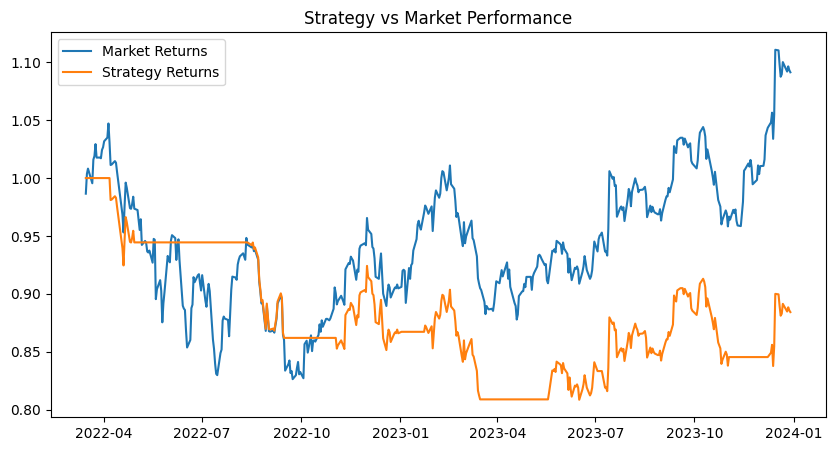

In [14]:
plt.figure(figsize=(10,5))
plt.plot(data['Cumulative_Market_Return'], label='Market Returns')
plt.plot(data['Cumulative_Strategy_Return'], label='Strategy Returns')
plt.legend()
plt.title("Strategy vs Market Performance")
plt.show()
